# FAKE NEWS CLASSIFIER

Import All the basic modules:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from statistics import mode

Import the news csv file which contains the train and test data:

In [2]:
df=pd.read_csv("news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

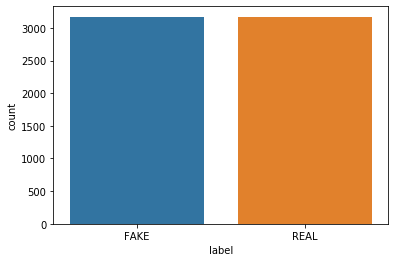

In [5]:
sns.countplot(x="label", data=df)#plot to check the no.of Fake and real news count

Import train, test, split and preprocessing modules: 

In [6]:
y=df.label
x=df.text

In [7]:
x.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [8]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [9]:
y.shape

(6335,)

In [10]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=101)

In [11]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [12]:
tf_train=tfidf_vectorizer.fit_transform(x_train) 
tf_test=tfidf_vectorizer.transform(x_test)

In [13]:
tf_train.shape

(4434, 57938)

In [14]:
tf_test.shape

(1901, 57938)

In [15]:
def predictions(model):
    y_pred=model.predict(tf_test)
    score=accuracy_score(y_test,y_pred)
    print("Accuracy: {}%".format(round(score*100,2)))
    print(confusion_matrix(y_test,y_pred, labels=['FAKE','REAL']))

PassiveAggressiveClassifier for analyzing the data:

In [16]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [17]:
predictions(pac)

Accuracy: 93.69%
[[894  49]
 [ 71 887]]


In [18]:
lr = LogisticRegression()
lr.fit(tf_train,y_train)

C:\Users\bandu\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
predictions(lr)

Accuracy: 91.32%
[[894  49]
 [116 842]]


In [20]:
svc = SVC(kernel='linear')
svc.fit(tf_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
predictions(svc)

Accuracy: 93.11%
[[899  44]
 [ 87 871]]


In [22]:
rfc = RandomForestClassifier()
rfc.fit(tf_train,y_train)

C:\Users\bandu\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
predictions(rfc)

Accuracy: 83.85%
[[831 112]
 [195 763]]


In [24]:
mnb = MultinomialNB()
mnb.fit(tf_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
predictions(mnb)

Accuracy: 84.8%
[[673 270]
 [ 19 939]]


# Code to scrap data from inshorts:

In [26]:
from urllib.request import urlopen as req
from bs4 import BeautifulSoup as soup
import csv
my_url="https://inshorts.com/en/read"

uclient = req(my_url)
page_html = uclient.read()
uclient.close()
page_soup = soup(page_html, "html.parser")
containers = page_soup.findAll("div", {"class" : "card-stack"})

filename = "news_scrap.csv"
f = open(filename, "w", encoding="utf-8")

#headers = "title,text\n"
#f.write(headers)

row_list = [
    ["Title", "Text"],]

for container in containers:
    for i in range(20):
    
        title_container = container.find_all("span", {"itemprop": "headline"})
        title = title_container[i].text

        article_container = container.find_all("div", {"itemprop": "articleBody"})
        article = article_container[i].text
        row_list.append([title, article])

print(row_list)
f.close()

with open('inshorts.csv', 'w', newline='',encoding='utf-8') as file:
    writer = csv.writer(file, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerows(row_list)

[['Title', 'Text'], ['Video of Kangana Ranaut from March saying she used to be a drug addict surfaces', 'A video of Kangana Ranaut claiming that she used to be a drug addict has gone viral. The video was posted on Kangana\'s Instagram account in March from Manali in Himachal Pradesh. "Soon as I ran away from my house, I became a film star in a couple of years and a drug addict," she says in the video.'], ["NCB makes multiple arrests from Mumbai, Goa in drug angle in Sushant's death case", "The Narcotics Control Bureau (NCB) on Saturday made multiple arrests from Mumbai and Goa in connection with drugs case related to Sushant Singh Rajput's death case. NCB Mumbai arrested alleged drug dealers Karamjeet Singh Anand, Dywan Anthony Fernandes, Ankush Arenja and several others, seizing ganja and charas from them. Meanwhile, NCB Goa arrested a man named Chris Costa."], ['Hollywood actress Felicity Jones secretly welcomes first baby', 'Hollywood actress Felicity Jones has secretly given birth 

Load the data to be predicted:

In [27]:
pred_data=pd.read_csv("inshorts.csv")

In [28]:
pred_text=pred_data.Text
pred_title=pred_data.Title

In [29]:
pred_text_tranf=tfidf_vectorizer.transform(pred_text) 

In [30]:
pred_text_tranf.shape

(20, 57938)

# Predicted data after analyzing:

In [31]:
y_pred1=pac.predict(pred_text_tranf)
y_pred2=mnb.predict(pred_text_tranf)
y_pred3=lr.predict(pred_text_tranf)
y_pred4=svc.predict(pred_text_tranf)
y_pred5=rfc.predict(pred_text_tranf)

In [32]:
y_pred=[]
for i in range(pred_text_tranf.shape[0]):
    predictions= [y_pred1[i], y_pred2[i], y_pred3[i], y_pred4[i], y_pred5[i]]
    pred=mode(predictions)
    y_pred.append(pred)

In [33]:
for i in zip(pred_title,y_pred):
    print(i)

('Video of Kangana Ranaut from March saying she used to be a drug addict surfaces', 'FAKE')
("NCB makes multiple arrests from Mumbai, Goa in drug angle in Sushant's death case", 'FAKE')
('Hollywood actress Felicity Jones secretly welcomes first baby', 'FAKE')
("Cong holds rally to protest 'conspiracy' against 'Bengal's daughter' Rhea", 'FAKE')
('Iran executes champion wrestler Navid Afkari despite global campaign', 'FAKE')
('Trent Boult breaks the stump into 2 pieces during training, MI share pic', 'FAKE')
('Conor McGregor arrested on suspicion of indecent exposure, attempted sexual assault', 'FAKE')
('IPL gets its first USA player as Ali Khan replaces Harry Gurney in KKR', 'FAKE')
("If Maha CM can't look after law & order, he should resign: Ex-Navy officer", 'FAKE')
('Ex-Union Minister Raghuvansh Singh critically ill, put on ventilator', 'REAL')
('Prashant Bhushan moves SC for right to appeal in contempt case', 'FAKE')
("Relatives enter KEM Hospital's emergency ward, abuse doctor afte